In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# Exploratory Data Analysis

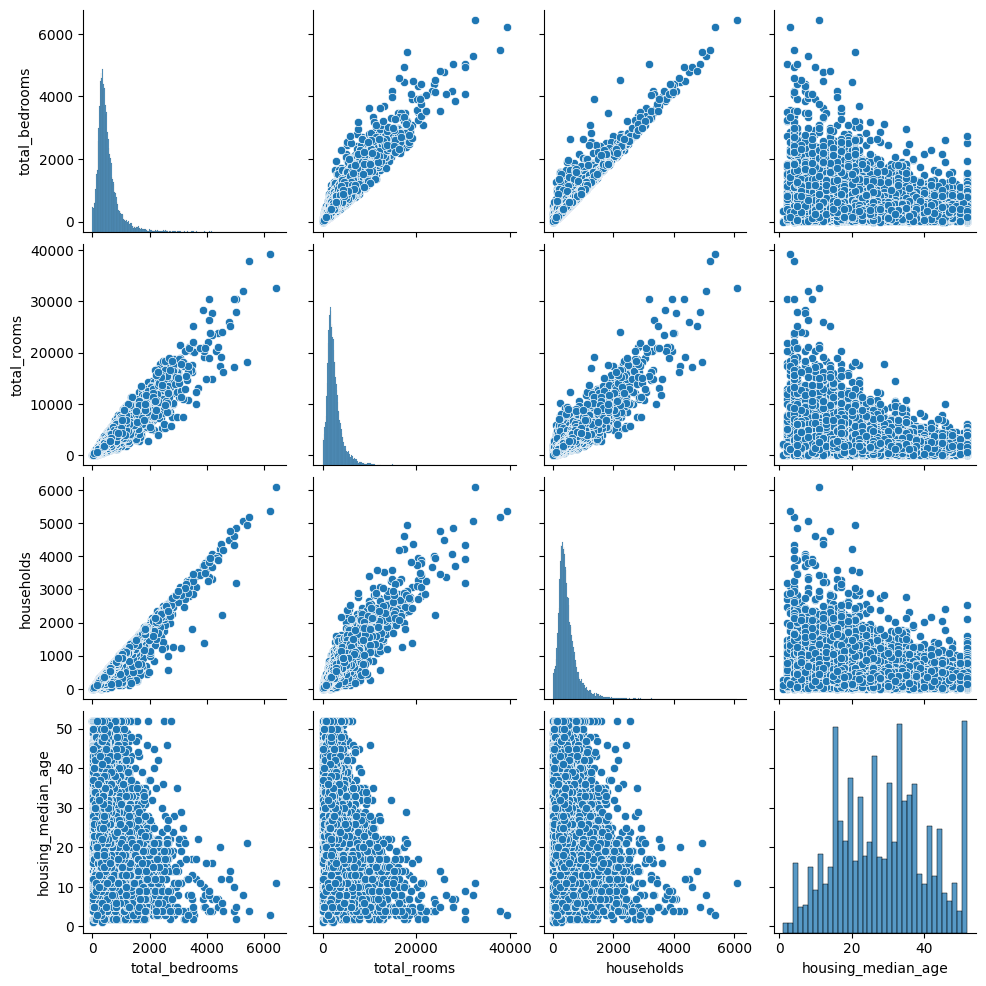

In [4]:
sns.pairplot(df, vars=['total_bedrooms', 'total_rooms','households','housing_median_age'])

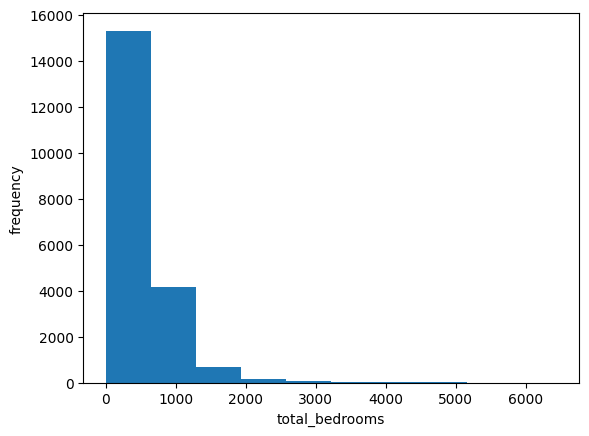

In [5]:
df['total_bedrooms'].plot(kind='hist')
plt.xlabel('total_bedrooms')
plt.ylabel('frequency')
plt.show()

I can see that most houses have bedrooms between 0 to 1000. Very few houses have over 1000 bedrooms.

# Handling missing values

There are number of methods to handle missing values, but basically, we can do one of these but we have to keep in mind that each can affect our analysis:

* Removing the missing values
* Filling the missing values
* Leaving the missing values as it is.

Starting from the first one, in order to remove the missing values, fairly simple. We can do the following, and we are done.

## 1. Removing the missing values

In [7]:
# removing rows
df1 = df.copy()
df1.dropna(inplace=True)
df1.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
# removing columns
df2 = df.copy()
df2 = df2.dropna(axis='columns', thresh=2)  # thresh=2 → keep a column only if it has at least 2 non-null values
df2.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [10]:
# removing columns
df3 = df.copy()
df3 = df3.dropna(axis='columns', how='all')   # how='all' → drop only if ALL values are NaN
df3.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
# removing columns
df4 = df.copy()
df4 = df4.dropna(axis='columns', how='any')   # how='any' → drop only if ANY value is NaN
df4.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## 2. Filling the missing values

In [13]:
df5 = df.copy()
df5 = df5.fillna(3)  # Replace all missing (NaN) values with 3
df5.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [14]:
# Filling missing values using forward or backward fill:
# method='ffill' → forward fill (use previous value to fill NaN)
# method='bfill' → backward fill (use next value to fill NaN)


df6 = df.copy()
df6 = df6.fillna(method='ffill')
df6.isna().sum()

/tmp/ipython-input-2686541191.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df6 = df6.fillna(method='ffill')


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


* Forward or backward fill can be wrong and lead to unrealistic or biased values
* Filling missing values using mean or median can avoid extreme biases from ffill/bfill

In [15]:
from sklearn.impute import SimpleImputer

# Filling missing numeric values with column mean
df_numeric = df.drop('ocean_proximity', axis=1)
imputer = SimpleImputer(strategy='mean')
mean_filled = imputer.fit_transform(df_numeric)

# Converting back to DataFrame
mean_filled_df = pd.DataFrame(mean_filled, columns=df_numeric.columns)
mean_filled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


ডেটাতে যদি missing value থাকে, তাহলে এর সাথে কী করা উচিত?
ডিলিট করা:


1.   যদি খুব কম missing value থাকে

* সরাসরি remove করা ভালো।
* কারণ খুব কম ডেটা হারালে বিশ্লেষণে প্রভাব কম।
* মানে: “Quality over quantity”


---


2.   Fill করা বা Impute করা:

* শুধু একটি fixed value (mean, median, forward/backward fill) দিয়ে replace করা সবসময় সঠিক না।
* কখনও কখনও এটা biased বা unrealistic result দিতে পারে।

---
3.   Feature অনুযায়ী fill করা:

* Iterative Imputer (Regression Imputer) ব্যবহার করা যায়।
* এটা লিনিয়ার রিগ্রেশন প্রিন্সিপল অনুযায়ী কাজ করে।
* প্রতিটি ফিচারকে বাকি ফিচার থেকে estimate করে missing value পূরণ করে।
* ফলে আগের fixed value fill এর চেয়ে অনেক বেশি “স্মার্ট” এবং রিয়েলিস্টিক।
---

💡 সংক্ষেপে:
###### কম missing → ড্রপ করুন।
###### বেশি missing বা গুরুত্বপূর্ণ ফিচার → Iterative Imputer ব্যবহার করুন।

# Iterative Imputer

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Impute missing numeric values using Iterative Imputer
housing_imputed = IterativeImputer().fit_transform(df_numeric)
housing_imputed_df = pd.DataFrame(housing_imputed, columns=df_numeric.columns)
housing_imputed_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
